# Kaggle Learn
#### Machine Learning Level 2

<br>Source: https://www.kaggle.com/learn/machine-learning
<br>Slide Command: jupyter nbconvert Presentation.ipynb --to slides --post serve
<br><br>

Presentor: Kavi Sekhon



### L1: Missing Value Introduction
Source: https://www.kaggle.com/dansbecker/handling-missing-values

In [15]:
# Import pandas and our training data
import pandas as pd
main_file_path = 'Data/train.csv'
data = pd.read_csv(main_file_path)

In [16]:
# View the total sum of null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

### Null Value Solutions


##### 1) A Simple Option: Drop Columns with Missing Values

In [17]:
# Copying the data into a pandas dataframe
original_data = pd.DataFrame(data)

In [18]:
# Dropping any row with a missing value
data_without_missing_values = original_data.dropna(axis=1)
data_without_missing_values.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


##### 2) A Better Option: Imputation


* Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.
* The default behavior fills in the mean value for imputation. Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.
* One (of many) nice things about Imputation is that it can be included in a scikit-learn Pipeline. Pipelines simplify model building, model validation and model deployment.

* Warning: Sklearn imputation only work on numeric values

In [19]:
# Creating a list of numerical columns
numeric_columns  = list(original_data.select_dtypes(include=[int, float]).columns)

# Import the imputer class from sklearn
from sklearn.preprocessing import Imputer

# Assign the Imputer to a variable
my_imputer =  Imputer()

# Fit and transform numerical columns with imputed values
data_with_imputed_values = my_imputer.fit_transform(original_data[numeric_columns])

# View the imputated values
data_with_imputed_values

array([[  1.00000000e+00,   6.00000000e+01,   6.50000000e+01, ...,
          2.00000000e+00,   2.00800000e+03,   2.08500000e+05],
       [  2.00000000e+00,   2.00000000e+01,   8.00000000e+01, ...,
          5.00000000e+00,   2.00700000e+03,   1.81500000e+05],
       [  3.00000000e+00,   6.00000000e+01,   6.80000000e+01, ...,
          9.00000000e+00,   2.00800000e+03,   2.23500000e+05],
       ..., 
       [  1.45800000e+03,   7.00000000e+01,   6.60000000e+01, ...,
          5.00000000e+00,   2.01000000e+03,   2.66500000e+05],
       [  1.45900000e+03,   2.00000000e+01,   6.80000000e+01, ...,
          4.00000000e+00,   2.01000000e+03,   1.42125000e+05],
       [  1.46000000e+03,   2.00000000e+01,   7.50000000e+01, ...,
          6.00000000e+00,   2.00800000e+03,   1.47500000e+05]])

##### 3) An Extention to Imputation

In [20]:
# make a copy to avoid changing original data (when Imputing)
new_data = original_data[numeric_columns].copy()

In [21]:
# Finding features with missing null values
cols_with_missing = (col for col in new_data.columns
                    if new_data[col].isnull().any())

# creating pandas dataframe with only missing null values
for col in cols_with_missing:
  new_data[col + '_was missing'] = new_data[col].isnull()
  
# Imputating featurse with missing data
my_imputer = Imputer()
new_data = my_imputer.fit_transform(new_data)

### Comparing All Null Value Solution

##### Basic Problem Set-up

In [22]:
# Import pandas and sklean modules
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Import data
melb_data = pd.read_csv('Data/melb_data.csv')

# Set target, and predictors
melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])

##### Creating Function to Measure Quality of An Approach

In [23]:
# Import RandomForestModel, Mean Absolute Error, and Train-Test Split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data by train-test split
X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

# Creating a function to score our model that includeds imputated data
def score_dataset(X_train, X_test, y_train, y_test):
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  return (mean_absolute_error(y_test, preds))

##### 1) Get Model Score from Dropping Columns with Missing Values

In [24]:
# Generating a list of column for columns with missing data
cols_with_missing = [col for col in X_train.columns 
                     if X_train[col].isnull().any()]

# Ceating predictor dataframe without columns that contain missing values
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

# Using our scoring function to print out our accuracy measure
print('Mean Absolute Error form dropping columsn with Missing Values:')
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))


Mean Absolute Error form dropping columsn with Missing Values:
345353.822196



##### 2) Get Model Score from imputation

In [25]:
# Creating testing and training data using Imputation
from sklearn.preprocessing import Imputer
 
my_impture = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)


# Using our scoring function to print out our accuracy measure for Imputation
print('Mean Absolute Error from Impuation:')
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Impuation:
203709.622305


##### 3) Get Score from Imputation with Extra Columns Showing What Was Imputed

In [26]:
# Copy our imputed training and test data from the last example
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

# Generating a list of columns that containe missing values
cols_with_missing =  (col for col in X_train.columns
                     if X_train[col].isnull().any())

# creating a seperate list of columns of null values in the train and test data
for col in cols_with_missing:
  imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
  imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()
  
  
# Impuation fitting and transforming data for both train and test set
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.fit_transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:
208442.050571


* In this case, the extension didn't make a big difference. As mentioned before, this can vary widely from one dataset to the next (largely determined by whether rows with missing values are intrinsically like or unlike those without missing values).

### L2: Using Categorical Data with One Hot Encoding
Source: https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

In [27]:
# Read the data
import pandas as pd
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

# Drop the houses where the target is missing
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

# Creating the target series
target = train_data.SalePrice


# Generating a list of columns that containe missing values
cols_with_missing = [col for col in train_data.columns
                    if train_data[col].isnull().any()]

# Creatinp the training and testing dataframe
candidate_train_predictors = train_data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['Id'] + cols_with_missing, axis=1)



In [28]:
# Tangent: Dataframe Dtypes

candidate_train_predictors.dtypes.sample(10)

OverallCond      int64
ExterQual       object
OverallQual      int64
2ndFlrSF         int64
TotRmsAbvGrd     int64
Exterior2nd     object
OpenPorchSF      int64
HeatingQC       object
ExterCond       object
LotArea          int64
dtype: object

In [29]:
# creating a list of colums that had dtype equal to object
# and number of unique values in series is less than 10
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]

# creating a list of colums that use either a int of float dtype
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]

# creating a list columns including numrecial and low cardinality features
my_cols = low_cardinality_cols + numeric_cols

# creating the trainin data
train_predictors = candidate_train_predictors[my_cols]

# creating the testing data
test_predictors = candidate_test_predictors[my_cols]

In [30]:
### current dataframe
train_predictors.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,608,0,42,0,0,0,0,0,9,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,642,0,35,272,0,0,0,0,2,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,836,192,84,0,0,0,0,0,12,2008


In [31]:
### printing number of feature train_predictors
print('Number for features:',train_predictors.shape[1])

Number for features: 57


### Using One Hot Encoding

In [32]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_training_predictors.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


### Comparing one-hot encoded model vs non-categorical mode1

In [33]:
# Importing RandomForestRegressor, and cross val score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# A quick function that return the our accuracy metrics for given training values 
def get_mae(X, y):
  return -1 * cross_val_score(RandomForestRegressor(50),
                             X, y, scoring='neg_mean_absolute_error').mean()

# creating a dataframe with numeical values
predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

# Viewing mae with and without one-host encoding using a RandomForestRegressor
mae_without_categoricals = get_mae(predictors_without_categoricals, target)
mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 18265
Mean Abslute Error with One-Hot Encoding: 18228


### Applying to Multiple Files

In [34]:
# Encoding training and testing data seperately
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)

# This was cool, I was not aware of this
final_train, final_test = one_hot_encoded_training_predictors.align(
  one_hot_encoded_test_predictors, join='left', axis=1)

* The align command makes sure the columns show up in the same order in both datasets (it uses column names to identify which columns line up in each dataset.) The argument join='left' specifies that we will do the equivalent of SQL's left join. That means, if there are ever columns that show up in one dataset and not the other, we will keep exactly the columns from our training data. The argument join='inner' would do what SQL databases call an inner join, keeping only the columns showing up in both datasets. That's also a sensible choice.

### One-Hot Encoding Conclusion

* Pipelines: Deploying models into production ready systems is a topic unto itself. While one-hot encoding is still a great approach, your code will need to built in an especially robust way. Scikit-learn pipelines are a great tool for this. Scikit-learn offers a class for one-hot encoding and this can be added to a Pipeline. Unfortunately, it doesn't handle text or object values, which is a common use case.


* Applications To Text for Deep Learning: Keras and TensorFlow have fuctionality for one-hot encoding, which is useful for working with text.


* Categoricals with Many Values: Scikit-learn's FeatureHasher uses the hashing trick to store high-dimensional data. This will add some complexity to your modeling code.

# <center> L3: Learning to Use XGBoost


Source: https://www.kaggle.com/dansbecker/learning-to-use-xgboost

* XGBoost is the leading model for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models dominate many Kaggle competitions.


* To reach peak accuracy, XGBoost models require more knowledge and model tuning than techniques like Random Forest. 

* XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) What is Gradient Boosted Decision Trees? We'll walk through a diagram.

### [Image Here]

* We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

* To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.

* There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

* This process may sound complicated, but the code to use it is straightforward. We'll fill in some additional explanatory details in the model tuning section below.


### Example - XG Boost

In [35]:
# Model Setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

# Import Data, set Target & predictators
data = pd.read_csv('Data/train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

# Imputate training and testing data
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [36]:
# Importing the XGB Regressor from XGBoost
from xgboost import XGBRegressor

# Assiinging my model
my_model = XGBRegressor()

# I set the verbose to True, because logs are cool, initially
my_model.fit(train_X, train_y, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
# make predictions on training dataset
predictions = my_model.predict(test_X)

# print mae for training set 
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:' + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error:18207.1453125


##### Model Tuning

* XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are: n_estimators and early_stopping_rounds

* n_estimators specifies how many times to go through the modeling cycle described above.


[Image]

* In the underfitting vs overfitting graph, n_estimators moves you further to the right. Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate discussed below


* The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.


* Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. early_stopping_rounds = 5 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

In [38]:
# Fitting model parameters n_esimators
my_model = XGBRegressor(n_emtimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5,
            eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_emtimators=1000,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

* When using early_stopping_rounds, you need to set aside some of your data for checking the number of rounds to use. If you later want to fit a model with all of your data, set n_estimators to whatever value you found to be optimal when run with early stopping.

* Learning Rate: Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in. This means each tree we add to the ensemble helps us less. In practice, this reduces the model's propensity to overfit.

* So, you can use a higher value of n_estimators without overfitting. If you use early stopping, the appropriate number of trees will be set automatically.

* In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

In [39]:
# Fitting model parameters with a learning rate
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5,
            eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

* n_jobs: On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.


* The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

# <center> L4: Partial Dependence Plots

Source: https://www.kaggle.com/dansbecker/partial-dependence-plots

* Partial dependence plots show how each variable or predictor affects the model's predictions

* The partial dependence plot is calculated only after the model has been fit.

(<matplotlib.figure.Figure at 0x111010dd8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x110fee240>])

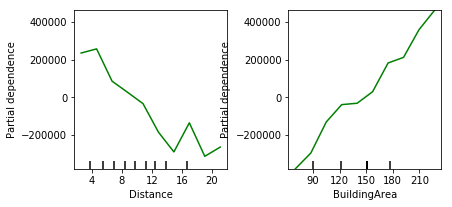

In [40]:
# Jupyter Command sto show visualization inline, after the cell
%matplotlib inline

# Import modules
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

# feature selcetion of our interested columns
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

# Creating a fucntion that call some data
def get_some_data():
    data = pd.read_csv('Data/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

# Return training data from "get_some_data" function
X, y = get_some_data()

# Use the GradienBoostReqgressor
my_model = GradientBoostingRegressor()

# Fit the model
my_model.fit(X, y)

# Creating Partial Dependence plots with SKlearn
my_plts = plot_partial_dependence(my_model, features=[0,2],
                                 X=X, feature_names=cols_to_use, 
                                 grid_resolution=10)
# View my plots
my_plts

Some tips related to plot_partial_dependence:

* The features are the column numbers from the X array or dataframe that you wish to have plotted. This starts to look bad beyond 2 or 3 variables. You could make repeated calls to plot 2 or 3 at a time.


* There are options to establish what points on the horizontal axis are plotted. The simplest is grid_resolution which we use to determine how many different points are plotted. These plots tend to look jagged as that value increases, because you will pick up lots of randomness or noise in your model. It's best not to take the small or jagged fluctuations too literally. Smaller values of grid_resolution smooth this out. It's also much less of an issue for datasets with many rows.



* There is a function called partial_dependence to get the raw data making up this plot, rather than making the visual plot itself. This is useful if you want to control how it is visualized using a plotting package like Seaborn. With moderate effort, you could make much nicer looking plots.

### Another Example: Titanic Dataest

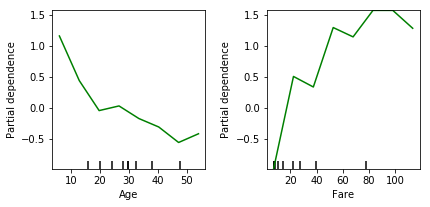

In [41]:
titanic_data = pd.read_csv('Data/titanic.csv')
titanic_y = titanic_data.Survived
clf = GradientBoostingClassifier()
titanic_X_colns = ['PassengerId','Age','Fare',]
titanic_X = titanic_data[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, titanic_y)
titanic_plots = plot_partial_dependence(clf, features=[1,2], X=imputed_titanic_X,
                                       feature_names=titanic_X_colns, grid_resolution=8)

These might seem surprising at first glance. But they show some interesting insights:

* Being young increased your odds of survival. This is consistent with historical recountings that they got women and children off the Titanic first.


* People who paid more had better odds of survival. It turns out that higher fares got you a cabin that was closer to the top of the boat, and may have given you better odds of getting a life-boat.

# <center> L5: Pipelines

Source: https://www.kaggle.com/dansbecker/pipelines

Pipelines are a simple way to keep your data processing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.


Many data scientists hack together models without pipelines, but Pipelines have some important benefits. Those include:

* Cleaner Code: You won't need to keep track of your training (and validation) data at each step of processing. Accounting for data at each step of processing can get messy. With a pipeline, you don't need to manually keep track of each step.


* Fewer Bugs: There are fewer opportunities to mis-apply a step or forget a pre-processing step.


* Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.


* More Options For Model Testing: You will see an example in the next tutorial, which covers cross-validation.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data in and split it into training and testing group 
data = pd.read_csv('Data/melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [43]:
# Import the stages of the DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

# Creating the Pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [44]:
# Fit the datframe to your pipeline
my_pipeline.fit(train_X, train_y)

# View the predictions from the dataframe
predictions = my_pipeline.predict(test_X)
predictions

array([ 1630250.,   603400.,  1317800., ...,   503520.,  3034500.,
         758800.])


# <center> L6: Cross Validation

Source: https://www.kaggle.com/dansbecker/cross-validation


### Trade-offs

* Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.


* For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.


* There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.

In [45]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

#  Import trainin and testing datasets
data = pd.read_csv('Data/melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

# Create a pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [46]:
# Sklearn 'cross_val_score metric' can give a cross_valitated score for any dataset
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-326467.92836727 -301780.43003476 -279584.68246464]


In [47]:
# Taking the mean of the scores, as the best performance measure
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 302611.013622


# <center> L7: Data Leakage

Source: https://www.kaggle.com/dansbecker/data-leakage
### What is Data Leakage

* Leakage: specifically, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate

### Leaky Predictors

* This occurs when your predictors include data that will not be available at the time you make predictions.


* People take antibiotic medicines after getting pneumonia in order to recover. So the raw data shows a strong relationship between those columns. But took_antibiotic_medicine is frequently changed after the value for got_pneumonia is determined. This is target leakage. The model would see that anyone who has a value of False for took_antibiotic_medicine didn't have pneumonia. Validation data comes from the same source, so the pattern will repeat itself in validation, and the model will have great validation (or cross-validation) scores. But the model will be very inaccurate when subsequently deployed in the real world. To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded. Because when we use this model to make new predictions, that data won't be available to the model.

### Leaky Validation Strategy

*  much different type of leak occurs when you aren't careful distinguishing training data from validation data. For example, this happens if you run preprocessing (like fitting the Imputer for missing values) before calling train_test_split. Validation is meant to be a measure of how the model does on data it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavoir.. The end result? Your model will get very good validation scores, giving you great confidence in it, but perform poorly when you deploy it to make decisions.

### Preventing Leaky Predictors
* However, leaky predictors frequently have high statistical correlations to the target. So two tactics to keep in mind:

    - To screen for possible leaky predictors, look for columns that are statistically correlated to your target.
    - If you build a model and find it extremely accurate, you likely have a leakage problem.
    
### Preventing Leaky Validation Strategies
* If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn Pipelines. When using cross-validation, it's even more critical that you use pipelines and do your preprocessing inside the pipeline.

In [48]:
import pandas as pd

# Import credit card data
data = pd.read_csv('Data/AER_credit_card_data.csv', 
                   true_values = ['yes'],
                   false_values = ['no'])
data.head(n=5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,True,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,True,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,True,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,True,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,True,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set target and predictors
y = data.card
X = data.drop(['card'], axis=1)

# Since there was no preprocessing, we didn't need a pipeline here.
# Used anyway as best practice.

# Creating a model Pipeline
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, X, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.976496


In [50]:
# Grouping expenditure data based on card and non-card holder
expenditures_cardholders = data.expenditure[data.card]
expenditures_noncardholders = data.expenditure[~data.card]

# Printing Mean for card expentiture grouping
print('Fraction of those who received a card with no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))
print('Fraction of those who received a card with no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))

Fraction of those who received a card with no expenditures: 0.02
Fraction of those who received a card with no expenditures: 1.00


In [51]:
# Author identifies features that may be causing leaks
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']

# Drop leaky features from dataframe
X2 = X.drop(potential_leaks, axis=1)

# computed cross_val_scores for our pipeline
cv_scores = cross_val_score(modeling_pipeline, X2, y, scoring='accuracy')

# print the mean cross_val_score
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.812744
